In [1]:
import pandas as pd
import sys
from rdkit import Chem
from rdkit.Chem import rdFingerprintGenerator
sys.path.append("../")
from tcad.cluster.butina import ButinaClustering

RDKIT_FINGERPRINT_GENERATOR = rdFingerprintGenerator.GetRDKitFPGenerator(maxPath=5)

ModuleNotFoundError: No module named 'tcad'

## Tanimoto example

In [2]:
salicilic_acid = 'c1ccc(c(c1)C(=O)O)O'
para_aminosalicilic_acid = 'C1=CC(=C(C=C1N)O)C(=O)O'

salicilic_acid = Chem.MolFromSmiles(salicilic_acid)
para_aminosalicilic_acid = Chem.MolFromSmiles(para_aminosalicilic_acid)

salicilic_acid_fingerprint = RDKIT_FINGERPRINT_GENERATOR.GetFingerprint(salicilic_acid)
para_aminosalicilic_acid_fingerprint = RDKIT_FINGERPRINT_GENERATOR.GetFingerprint(para_aminosalicilic_acid)

print("#"*29+" FINGERPRINTS "+"#"*29)
print(f"Finderprint of SA  : ...{salicilic_acid_fingerprint.ToBitString()[500:545]}...")
print(f"Finderprint of PASA: ...{para_aminosalicilic_acid_fingerprint.ToBitString()[500:545]}...\n")

tanimoto_similarity = round(Chem.DataStructs.TanimotoSimilarity(
    salicilic_acid_fingerprint, 
    para_aminosalicilic_acid_fingerprint
    ),3
)

print("#"*31+" TANIMOTO "+"#"*31)
print(f"Tanimoto similarity: {tanimoto_similarity}")
print(f"Tanimoto distance: {round((1-tanimoto_similarity), 3)}")


############################# FINGERPRINTS #############################
Finderprint of SA  : ...000000001000010000000000000000000000000000000...
Finderprint of PASA: ...000000001000010000000000000000000000000000000...

############################### TANIMOTO ###############################
Tanimoto similarity: 0.811
Tanimoto distance: 0.189


In [4]:
datapath = "../data/androgen_data.csv"
data = pd.read_csv(datapath)
data.head()

,assay_type,canonical_smiles,molecule_chembl_id,standard_units,standard_value,target_organism,type
0,B,CC1=CC(C)(C)Nc2ccc3c(c21)/C(=C/c1ccsc1)Oc1ccc(...,CHEMBL134277,nM,215.0,Homo sapiens,IC50
1,B,CC1(C)C(=O)N(c2ccc(C#N)c(C(F)(F)F)c2)C(=O)N1CC...,CHEMBL146794,nM,77.0,Homo sapiens,IC50
2,B,COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)C[C@@](O)...,CHEMBL2112885,nM,90.0,Homo sapiens,IC50
3,B,CC1=CC(C)(C)Nc2ccc3c(c21)/C(=C/c1ccccc1N(C)C)O...,CHEMBL336353,nM,1500.0,Homo sapiens,IC50
4,B,CC1=CC(C)(C)Nc2ccc3c(c21)/C(=C/c1ccccc1)Oc1c(F...,CHEMBL413309,nM,900.0,Homo sapiens,IC50


## Butina clustering

In [5]:
smiles = list(data['canonical_smiles'])
chembl_ids = list(data['molecule_chembl_id'])

butina_cluster = ButinaClustering(smiles, chembl_ids, 0.2)
butina_cluster.cluster()


### Look at cluster distribution at specified cut off

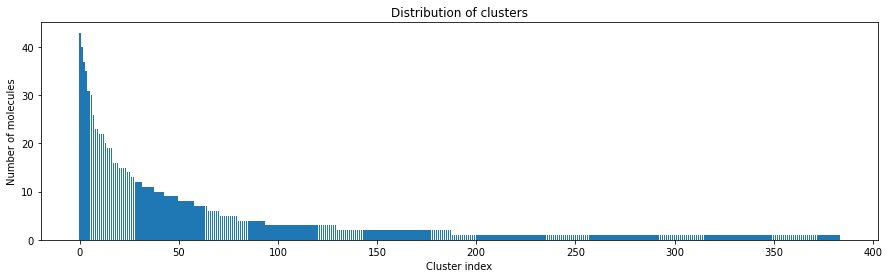

In [6]:
butina_cluster.plot_clusters()

### Look at first molecules of a luster

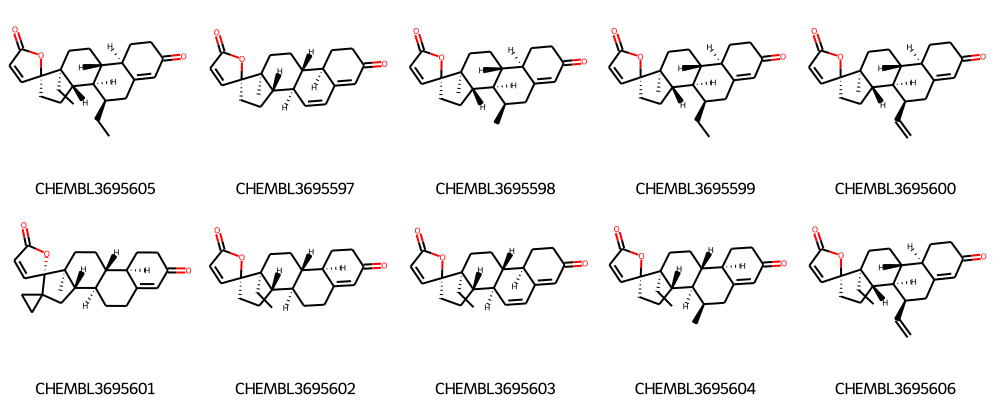

In [7]:
butina_cluster.plot_moleculs_of_cluster(0, 10)

### Look at clusters centroids

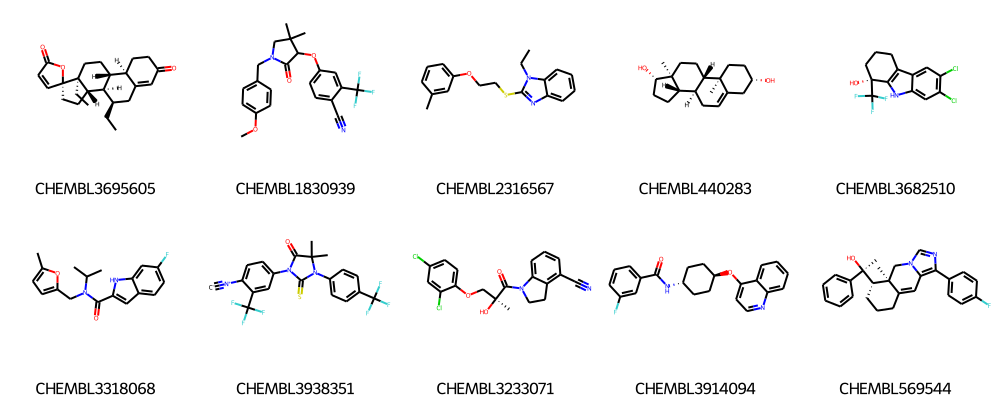

In [8]:
butina_cluster.plot_centroids(10)

### Get molecules from cluster

In [9]:
cluster_5_molecules = butina_cluster.get_molecules(5)